##**BUSINESS CASE - PORTER**

---


---





>Porter is India's Largest Marketplace for Intra-City Logistics. Leader in the country's $40 billion intra-city logistics market, Porter strives to improve the lives of 1,50,000+ driver-partners by providing them with consistent earning & independence. Currently, the company has serviced 5+ million customers.

> Porter works with a wide range of restaurants for delivering their items directly to the people.

> Porter has a number of delivery partners available for delivering the food, from various restaurants and wants to get an estimated delivery time that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners.

> This dataset has the required data to train a neural network model that will do the delivery time estimation, based on all those features.









###Defining problem statement, importing the data and data structure analysis

In [4]:
#IMPORTING IMPORTANT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#downloading the dataset
!gdown 1kkgBGldeswHBgVKEJiqqG7VZvqZNMc-5

Downloading...
From: https://drive.google.com/uc?id=1kkgBGldeswHBgVKEJiqqG7VZvqZNMc-5
To: /content/data_2.csv
100% 15.7M/15.7M [00:00<00:00, 46.0MB/s]


In [6]:
#reading the data to dataframe
df=pd.read_csv('data_2.csv')

In [7]:
df

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175772,1.0,2015-02-17 00:19:41,2015-02-17 01:02:41,28,4.0,3,1389,3,345,649,17.0,17.0,23.0,331.0
175773,1.0,2015-02-13 00:01:59,2015-02-13 01:03:59,28,4.0,6,3010,4,405,825,12.0,11.0,14.0,915.0
175774,1.0,2015-01-24 04:46:08,2015-01-24 05:32:08,28,4.0,5,1836,3,300,399,39.0,41.0,40.0,795.0
175775,1.0,2015-02-01 18:18:15,2015-02-01 19:03:15,58,1.0,1,1175,1,535,535,7.0,7.0,12.0,384.0


Data Dictionary

Each row in this file corresponds to one unique delivery. Each column corresponds to a feature as explained below.



1.   market_id : integer id for the market where the restaurant lies
1.   created_at : the timestamp at which the order was placed
1.   actual_delivery_time : the timestamp when the order was delivered
1.   store_primary_category : category for the restaurant
1.   order_protocol : integer code value for order protocol(how the order was placed ie: through porter, call to restaurant, pre booked, third part etc)
2.   total_items subtotal : final price of the order
2.   num_distinct_items : the number of distinct items in the order
2.   min_item_price : price of the cheapest item in the order
2.   max_item_price : price of the costliest item in order
2.   total_onshift_partners : number of delivery partners on duty at the time order was placed
1.   total_busy_partners : number of delivery partners attending to other tasks
1.   total_outstanding_orders : total number of orders to be fulfilled at the moment
2.   estimated_store_to_consumer_driving_duration : approximate travel time from restaurant to customer










In [8]:
#shape of the data
df.shape

(175777, 14)

In [9]:
#data types of columns
df.dtypes

,0
market_id,float64
created_at,object
actual_delivery_time,object
store_primary_category,int64
order_protocol,float64
total_items,int64
subtotal,int64
num_distinct_items,int64
min_item_price,int64
max_item_price,int64


In [10]:
#converting the datetime columns into datetime
df['created_at']=pd.to_datetime(df['created_at'])

In [11]:
df['actual_delivery_time']=pd.to_datetime(df['actual_delivery_time'])

In [12]:
#null values
df.isnull().sum()

,0
market_id,0
created_at,0
actual_delivery_time,0
store_primary_category,0
order_protocol,0
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0
max_item_price,0


###Data preprocessing and feature engineering

In [13]:
#Creating day of week column from created at timestamp
df['day_of_week']=df['created_at'].dt.day_name()

In [14]:
#creating hour of day column from created at timestamp
df['time_of_day']=df['created_at'].dt.hour

In [15]:
df

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,day_of_week,time_of_day
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,Friday,22
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,Tuesday,21
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0,Monday,0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,Thursday,3
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,Tuesday,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175772,1.0,2015-02-17 00:19:41,2015-02-17 01:02:41,28,4.0,3,1389,3,345,649,17.0,17.0,23.0,331.0,Tuesday,0
175773,1.0,2015-02-13 00:01:59,2015-02-13 01:03:59,28,4.0,6,3010,4,405,825,12.0,11.0,14.0,915.0,Friday,0
175774,1.0,2015-01-24 04:46:08,2015-01-24 05:32:08,28,4.0,5,1836,3,300,399,39.0,41.0,40.0,795.0,Saturday,4
175775,1.0,2015-02-01 18:18:15,2015-02-01 19:03:15,58,1.0,1,1175,1,535,535,7.0,7.0,12.0,384.0,Sunday,18


In [16]:
#creating target column
df['delivery_time']=(df['actual_delivery_time']-df['created_at']).dt.total_seconds()

In [17]:
df


,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,day_of_week,time_of_day,delivery_time
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,Friday,22,2820.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,Tuesday,21,2640.0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0,Monday,0,3300.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,Thursday,3,3540.0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,Tuesday,2,2760.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175772,1.0,2015-02-17 00:19:41,2015-02-17 01:02:41,28,4.0,3,1389,3,345,649,17.0,17.0,23.0,331.0,Tuesday,0,2580.0
175773,1.0,2015-02-13 00:01:59,2015-02-13 01:03:59,28,4.0,6,3010,4,405,825,12.0,11.0,14.0,915.0,Friday,0,3720.0
175774,1.0,2015-01-24 04:46:08,2015-01-24 05:32:08,28,4.0,5,1836,3,300,399,39.0,41.0,40.0,795.0,Saturday,4,2760.0
175775,1.0,2015-02-01 18:18:15,2015-02-01 19:03:15,58,1.0,1,1175,1,535,535,7.0,7.0,12.0,384.0,Sunday,18,2700.0


In [18]:
#identifying categorical columns
categorical=['market_id','store_primary_category','order_protocol','day_of_week','time_of_day']

In [19]:
#creating a copy of data for visualisation
data=df.copy()

For avoiding higher dimentionality and misleading arbitrary order, target encoding is used.

In [20]:
#target encoding using mean
for col in categorical:
  mean_encoded=df.groupby(col)['delivery_time'].mean()
  df[col]=df[col].map(mean_encoded)

In [21]:
df

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,day_of_week,time_of_day,delivery_time
0,2947.476761,2015-02-06 22:24:17,2015-02-06 23:11:17,2758.033328,2870.586728,4,3441,4,557,1239,33.0,14.0,21.0,861.0,2664.641657,2442.118095,2820.0
1,2692.524266,2015-02-10 21:49:25,2015-02-10 22:33:25,2673.125882,2801.758736,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,2672.489876,2408.842352,2640.0
2,2692.524266,2015-02-16 00:11:35,2015-02-16 01:06:35,2883.443086,2798.771777,4,4771,3,820,1604,8.0,6.0,18.0,289.0,2918.748864,2781.709700,3300.0
3,2947.476761,2015-02-12 03:36:46,2015-02-12 04:35:46,2946.986484,2870.586728,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,2694.468650,3010.686701,3540.0
4,2947.476761,2015-01-27 02:12:36,2015-01-27 02:58:36,2946.986484,2870.586728,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,2672.489876,3041.410506,2760.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175772,2947.476761,2015-02-17 00:19:41,2015-02-17 01:02:41,2560.711316,2593.749275,3,1389,3,345,649,17.0,17.0,23.0,331.0,2672.489876,2781.709700,2580.0
175773,2947.476761,2015-02-13 00:01:59,2015-02-13 01:03:59,2560.711316,2593.749275,6,3010,4,405,825,12.0,11.0,14.0,915.0,2664.641657,2781.709700,3720.0
175774,2947.476761,2015-01-24 04:46:08,2015-01-24 05:32:08,2560.711316,2593.749275,5,1836,3,300,399,39.0,41.0,40.0,795.0,2908.850865,2757.554348,2760.0
175775,2947.476761,2015-02-01 18:18:15,2015-02-01 19:03:15,2572.709283,2870.586728,1,1175,1,535,535,7.0,7.0,12.0,384.0,2844.587696,2544.297740,2700.0


###Data visualization and cleaning

In [22]:
data

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,day_of_week,time_of_day,delivery_time
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,Friday,22,2820.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,Tuesday,21,2640.0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0,Monday,0,3300.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,Thursday,3,3540.0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,Tuesday,2,2760.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175772,1.0,2015-02-17 00:19:41,2015-02-17 01:02:41,28,4.0,3,1389,3,345,649,17.0,17.0,23.0,331.0,Tuesday,0,2580.0
175773,1.0,2015-02-13 00:01:59,2015-02-13 01:03:59,28,4.0,6,3010,4,405,825,12.0,11.0,14.0,915.0,Friday,0,3720.0
175774,1.0,2015-01-24 04:46:08,2015-01-24 05:32:08,28,4.0,5,1836,3,300,399,39.0,41.0,40.0,795.0,Saturday,4,2760.0
175775,1.0,2015-02-01 18:18:15,2015-02-01 19:03:15,58,1.0,1,1175,1,535,535,7.0,7.0,12.0,384.0,Sunday,18,2700.0


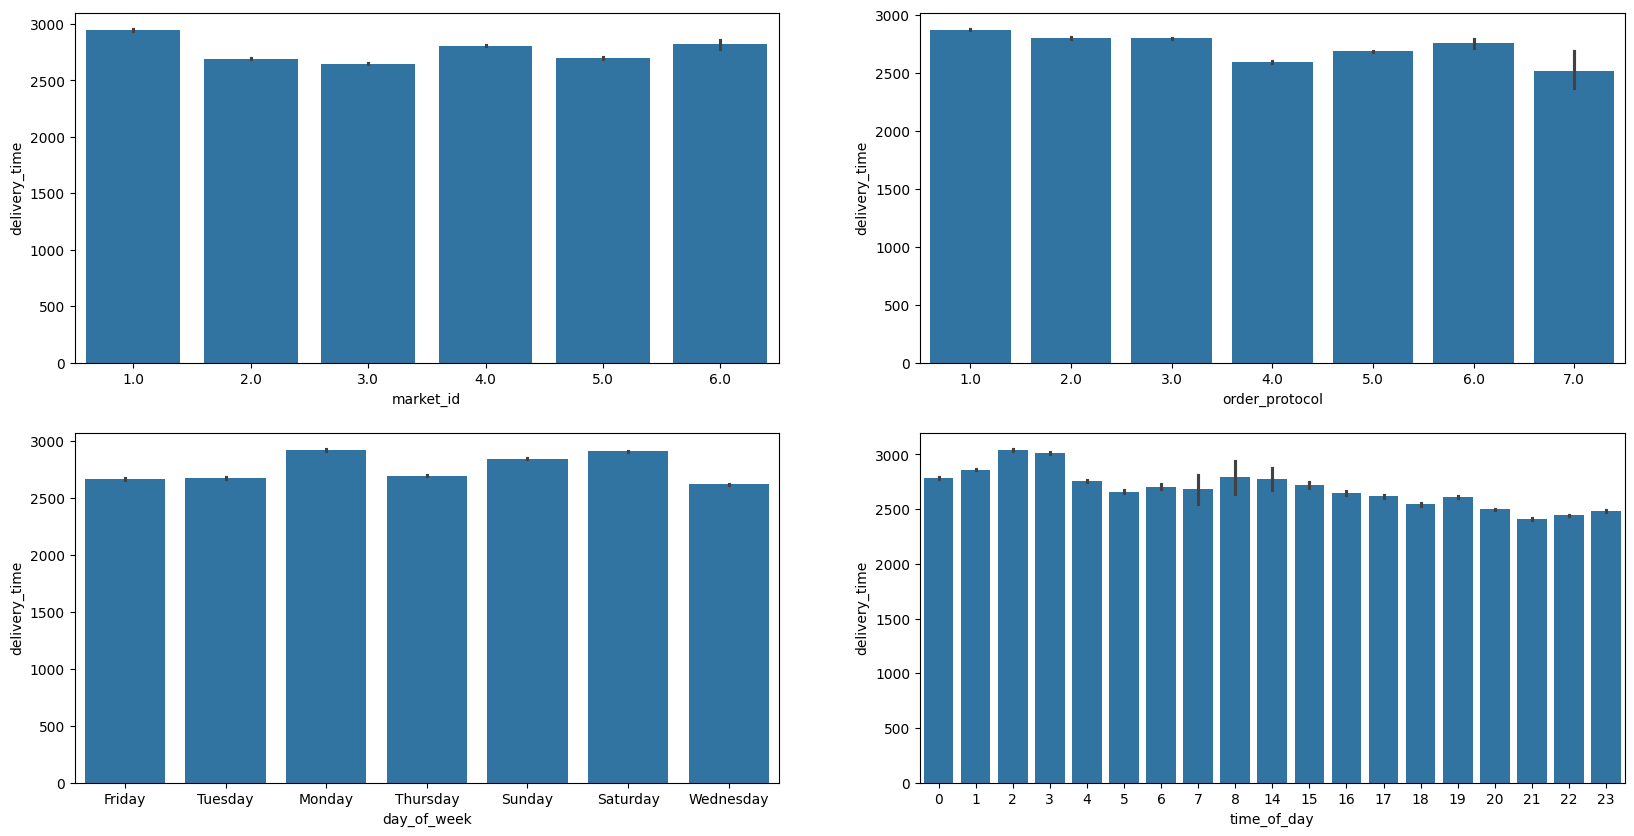

In [23]:
#distribution of delivery time with respect to categorical variables
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.barplot(data=data,x='market_id',y='delivery_time')
plt.subplot(2,2,2)
sns.barplot(data=data,x='order_protocol',y='delivery_time')
plt.subplot(2,2,3)
sns.barplot(data=data,x='day_of_week',y='delivery_time')
plt.subplot(2,2,4)
sns.barplot(data=data,x='time_of_day',y='delivery_time')
plt.show()

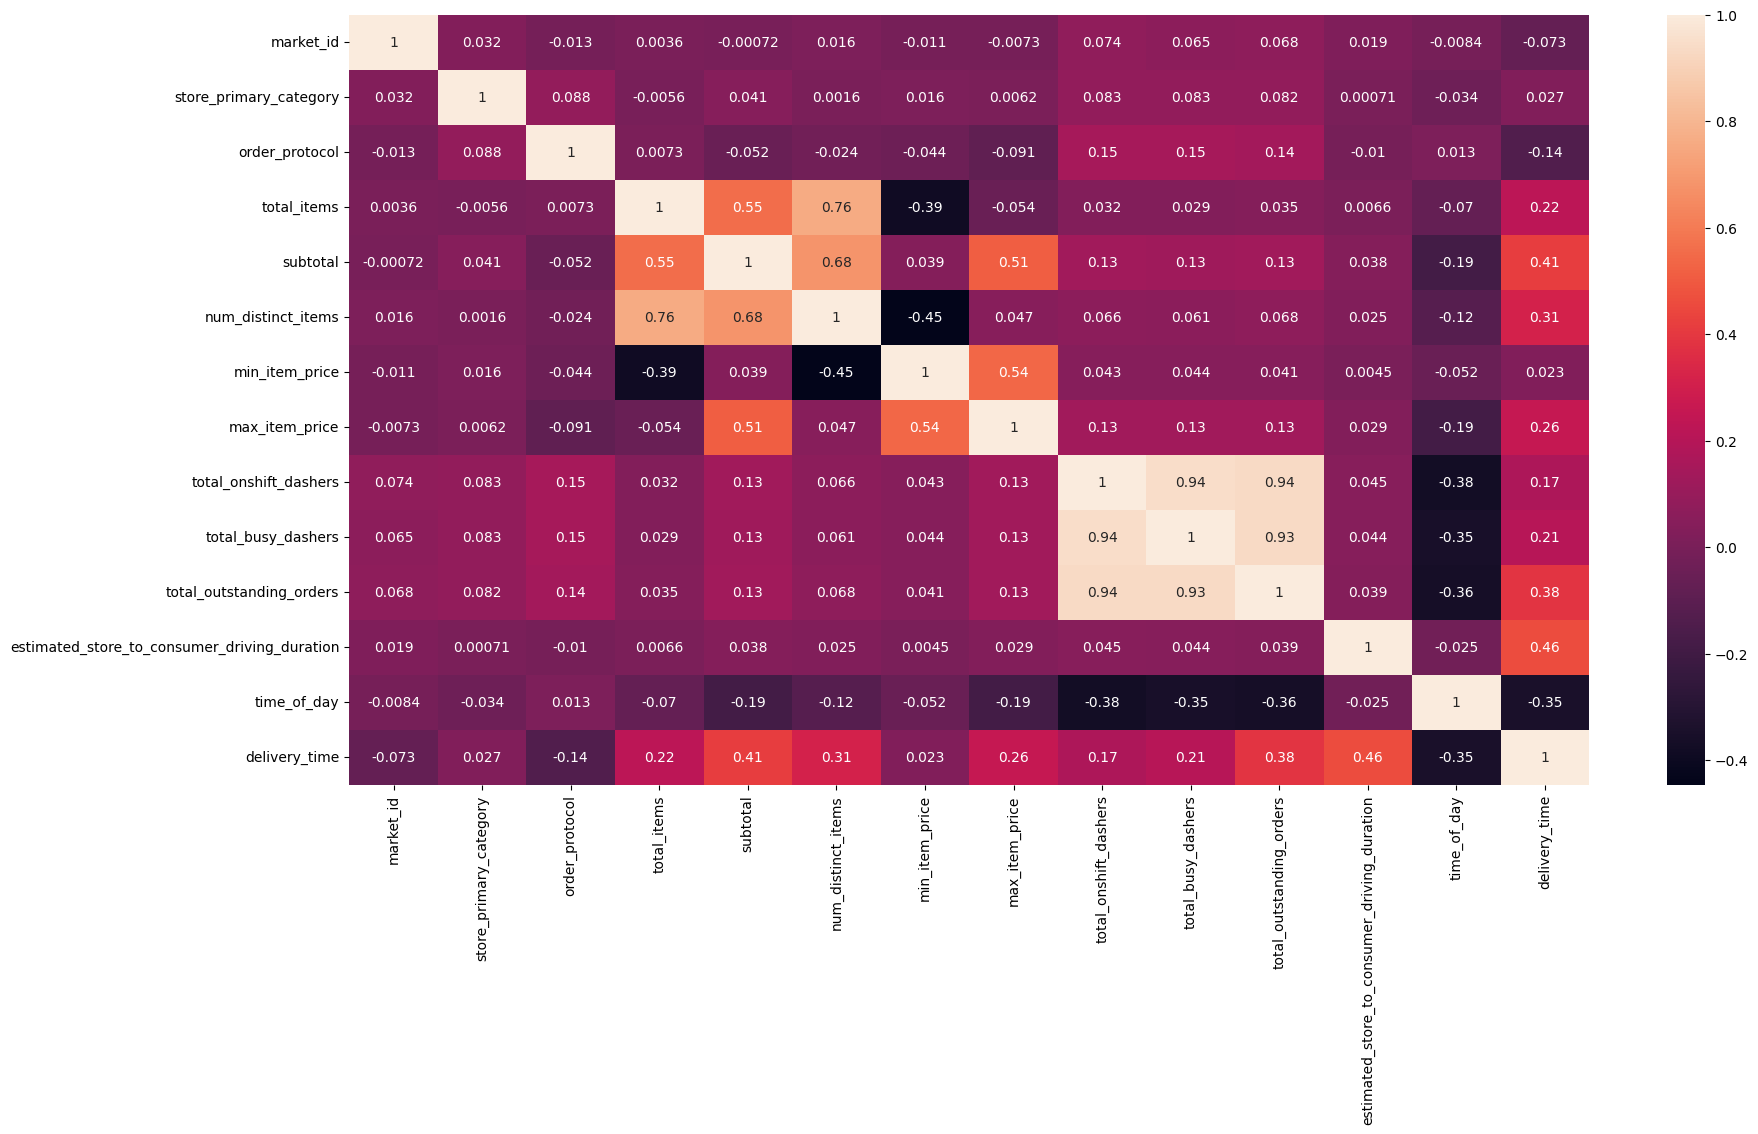

In [24]:
#correlation between numeric variables
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(numeric_only=True),annot=True)
plt.show()

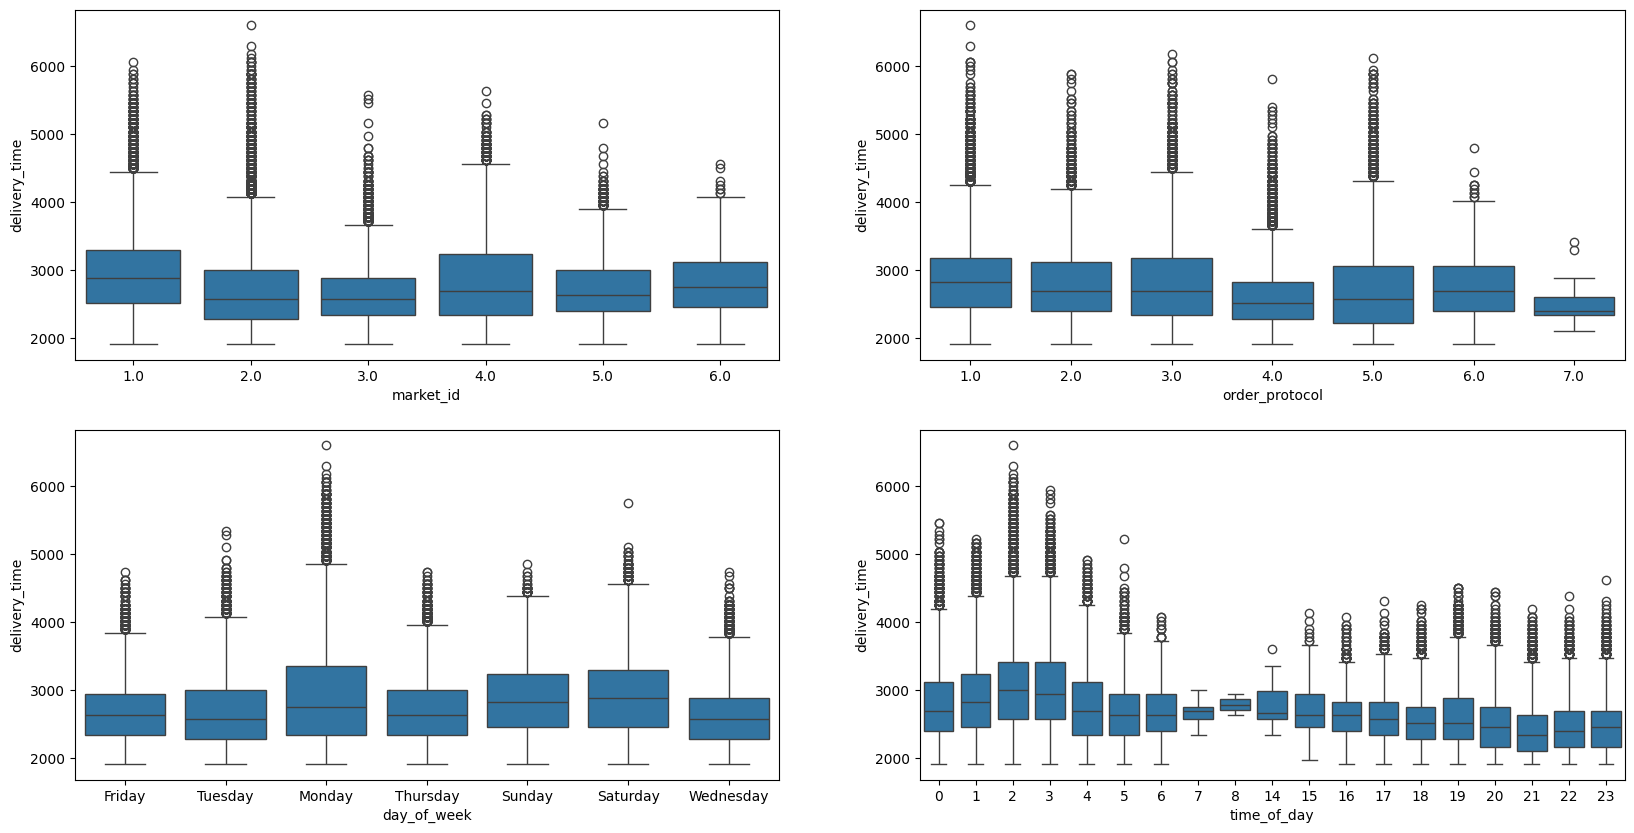

In [25]:
#boxplot of delivery time with respect to categorical variables
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.boxplot(data=data,x='market_id',y='delivery_time')
plt.subplot(2,2,2)
sns.boxplot(data=data,x='order_protocol',y='delivery_time')
plt.subplot(2,2,3)
sns.boxplot(data=data,x='day_of_week',y='delivery_time')
plt.subplot(2,2,4)
sns.boxplot(data=data,x='time_of_day',y='delivery_time')
plt.show()

<Axes: ylabel='delivery_time'>

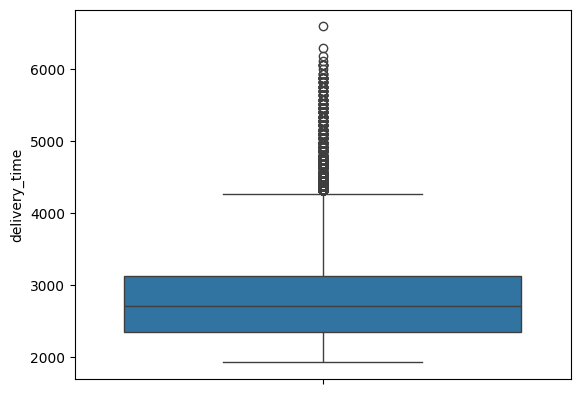

In [26]:
sns.boxplot(data=df,y='delivery_time')

In [27]:
#removing outliers using IQR method
Q1 = df['delivery_time'].quantile(0.25)
Q3 = df['delivery_time'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['delivery_time'] >= Q1 - 1.5 * IQR) & (df['delivery_time'] <= Q3 + 1.5 * IQR)]

<Axes: ylabel='delivery_time'>

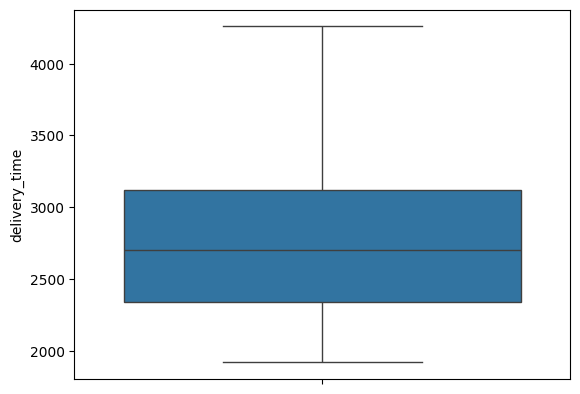

In [28]:
sns.boxplot(data=df,y='delivery_time')

###Regression with neural networks

In [29]:
#removing unnecessary columns
df.drop(['created_at','actual_delivery_time'],axis=1,inplace=True)

<ipython-input-29-1542807485>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['created_at','actual_delivery_time'],axis=1,inplace=True)


In [30]:
df

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,day_of_week,time_of_day,delivery_time
0,2947.476761,2758.033328,2870.586728,4,3441,4,557,1239,33.0,14.0,21.0,861.0,2664.641657,2442.118095,2820.0
1,2692.524266,2673.125882,2801.758736,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,2672.489876,2408.842352,2640.0
2,2692.524266,2883.443086,2798.771777,4,4771,3,820,1604,8.0,6.0,18.0,289.0,2918.748864,2781.709700,3300.0
3,2947.476761,2946.986484,2870.586728,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,2694.468650,3010.686701,3540.0
4,2947.476761,2946.986484,2870.586728,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,2672.489876,3041.410506,2760.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175772,2947.476761,2560.711316,2593.749275,3,1389,3,345,649,17.0,17.0,23.0,331.0,2672.489876,2781.709700,2580.0
175773,2947.476761,2560.711316,2593.749275,6,3010,4,405,825,12.0,11.0,14.0,915.0,2664.641657,2781.709700,3720.0
175774,2947.476761,2560.711316,2593.749275,5,1836,3,300,399,39.0,41.0,40.0,795.0,2908.850865,2757.554348,2760.0
175775,2947.476761,2572.709283,2870.586728,1,1175,1,535,535,7.0,7.0,12.0,384.0,2844.587696,2544.297740,2700.0


In [31]:
X=df.drop('delivery_time',axis=1)
y=df['delivery_time']

In [32]:
#standard scaling the features
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
for col in X.columns:
  X[col]=sc.fit_transform(X[[col]])
y=sc.fit_transform(y.values.reshape(-1,1))

In [33]:
#train-test split
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42)

print('Train : ', X_train.shape, y_train.shape)
print('Validation:', X_val.shape, y_val.shape)
print('Test  : ', X_test.shape, y_test.shape)

Train :  (140962, 14) (140962, 1)
Validation: (15663, 14) (15663, 1)
Test  :  (17403, 14) (17403, 1)


In [34]:
#importing tensorflow and keras
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [37]:
from tensorflow.keras.layers import Dropout

In [31]:
#creating a baseline model
def create_baseline():

  model = Sequential([
                    Dense(14, activation="relu",kernel_initializer='glorot_uniform'),
                    Dense(64, activation="relu",kernel_initializer='glorot_uniform'),
                    Dense(32, activation="relu",kernel_initializer='glorot_uniform'),
                    Dense(1,)])
  return model

In [32]:
model = create_baseline()

In [33]:
model.compile(optimizer = tf.keras.optimizers.Adam(),loss = tf.keras.losses.MSE )

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=200, verbose = 0)
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()

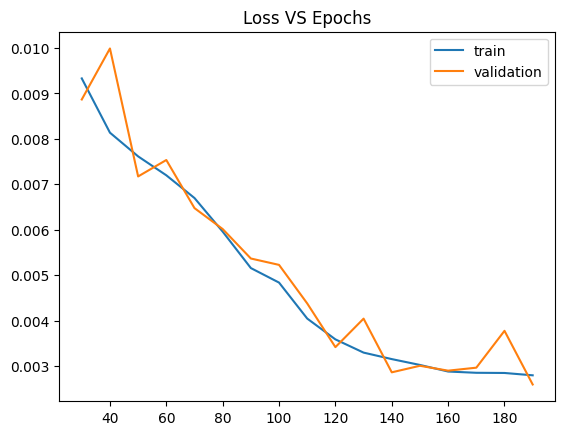

In [35]:
epochs = history.epoch[30::10]
loss = history.history["loss"][30::10]
val_loss = history.history["val_loss"][30::10]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()

Applying LR decay

In [41]:
from tensorflow.keras.callbacks import LearningRateScheduler


In [42]:
def scheduler(epoch, lr):
  r_0 = 0.01
  lr = (1/(1+r_0*epoch))*lr

  return lr

In [43]:
LRdecay = LearningRateScheduler(scheduler)

Applying drop out with changes in NN

In [56]:

def create_dropout():

  model = Sequential([
                    Dense(14, activation="relu",kernel_initializer='glorot_uniform'),
                    Dropout(0.3),
                    Dense(64, activation="relu",kernel_initializer='glorot_uniform'),
                    Dropout(0.3),
                    Dense(32, activation="relu",kernel_initializer='glorot_uniform'),
                    Dropout(0.3),
                    Dense(16, activation="relu",kernel_initializer='glorot_uniform'),
                    Dropout(0.3),
                    Dense(8, activation="relu",kernel_initializer='glorot_uniform'),
                    Dropout(0.3),
                    Dense(4, activation="relu",kernel_initializer='glorot_uniform'),
                    Dropout(0.3),
                    Dense(1,)])
  return model

In [57]:
model = create_dropout()

In [58]:
model.compile(optimizer = tf.keras.optimizers.Adam(beta_1 = 0.9, beta_2 = 0.999 ),
                loss = tf.keras.losses.MSE,metrics = ["MAPE"])

In [63]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=200, batch_size=128,callbacks=[LRdecay], verbose = 0)


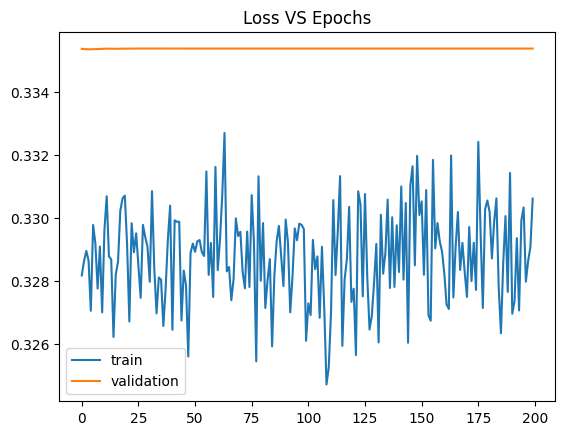

In [64]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]



plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()

In [65]:
model.evaluate(X_test,y_test)

544/544 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - MAPE: 77.4895 - loss: 0.3437


[0.3389817476272583, 76.8361587524414]

In [35]:
def create_dropout2():

  model = Sequential([
                    Dense(14, activation="relu",kernel_initializer='glorot_uniform'),
                    Dropout(0.3),
                    Dense(32, activation="relu",kernel_initializer='glorot_uniform'),
                    Dropout(0.3),
                    Dense(16, activation="relu",kernel_initializer='glorot_uniform'),
                    Dropout(0.3),
                    Dense(8, activation="relu",kernel_initializer='glorot_uniform'),
                    Dropout(0.3),
                    Dense(1,)])
  return model

In [38]:
model = create_dropout2()

In [39]:
model.compile(optimizer = tf.keras.optimizers.Adam(beta_1 = 0.9, beta_2 = 0.999 ),
                loss = tf.keras.losses.MSE,metrics = ["MAPE"])

In [44]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=200, batch_size=128,callbacks=[LRdecay], verbose = 0)


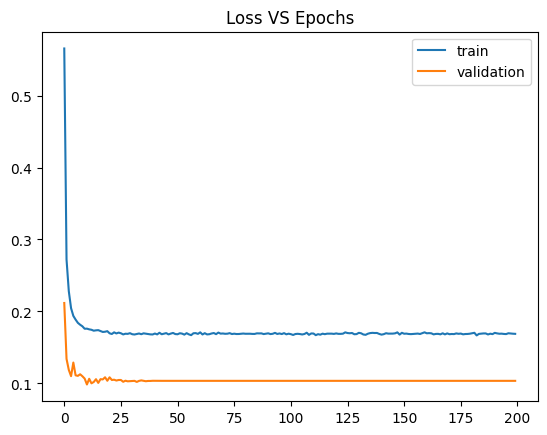

In [45]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]



plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()

In [46]:
model.evaluate(X_test,y_test)

544/544 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - MAPE: 70.0924 - loss: 0.1056


[0.10365075618028641, 69.6887435913086]

In [41]:
model.compile(optimizer = tf.keras.optimizers.Adam(beta_1 = 0.9, beta_2 = 0.999 ),
                loss = tf.keras.losses.MSE,metrics = ["MAPE"])

In [51]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=50, batch_size=128,callbacks=[LRdecay], verbose = 0)


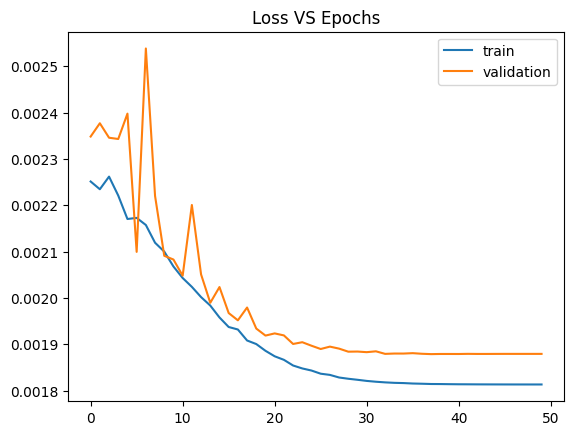

In [52]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()

In [53]:
model.evaluate(X_test,y_test)

544/544 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - MAPE: 19.0628 - loss: 0.0019


[0.0018848837353289127, 18.70368003845215]